In [66]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

get data from wc-datasets folder
make sure not to include the summary csv into the wc_data dataframe

In [190]:
joined_files = os.path.join("wc-datasets", "FIFA - 1*.csv")
joined_files2 = os.path.join("wc-datasets", "FIFA - 2*.csv")
joined_list = glob.glob(joined_files)
joined_list2 = glob.glob(joined_files2)

df1 = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
df2 = pd.concat(map(pd.read_csv, joined_list2), ignore_index=True)

wc_data = pd.concat([df1,df2])
wc_data

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
0,1,Uruguay,4,3,1,0,15,5,10,7
1,2,Brazil,6,4,1,1,22,6,16,9
2,3,Sweden,5,2,1,2,11,15,−4,5
3,4,Spain,6,3,1,2,10,12,−2,7
4,5,Yugoslavia,3,2,0,1,7,3,4,4
...,...,...,...,...,...,...,...,...,...,...
187,28,Japan,3,0,1,2,2,7,−5,1
188,28,Saudi Arabia,3,0,1,2,2,7,−5,1
189,30,Togo,3,0,0,3,1,6,−5,0
190,31,Costa Rica,3,0,0,3,3,9,−6,0


# Data Analysis

edit West germany to represent Germany

In [192]:
wc_data.loc[wc_data.Team == 'West Germany', 'Team'] = 'Germany'

In [18]:
wc_data[wc_data.Team == 'East Germany']

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
286,6,East Germany,6,2,2,2,5,5,0,6


create a world cup summary dataframe

In [19]:
wc_sum = pd.read_csv("wc-datasets/FIFA - World Cup Summary.csv")
wc_sum

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4
5,1958,Sweden,Brazil,Sweden,France,16,35,126,3.6
6,1962,Chile,Brazil,Czechoslovakia,Chile,16,32,89,2.8
7,1966,England,England,West Germany,Portugal,16,32,89,2.8
8,1970,Mexico,Brazil,Italy,West Germany,16,32,95,3.0
9,1974,West Germany,West Germany,Netherlands,Poland,16,38,97,2.6


In [96]:
wc_sum.loc[wc_sum["CHAMPION"] == 'West Germany', "CHAMPION"] = 'Germany'
wc_sum.loc[wc_sum["HOST"] == 'West Germany', "HOST"] = 'Germany'
wc_sum.loc[wc_sum["RUNNER UP"] == 'West Germany', "RUNNER UP"] = 'Germany'
wc_sum.loc[wc_sum["THIRD PLACE"] == 'West Germany', "THIRD PLACE"] = 'Germany'

Group the dataframe
get the average position and the sum of all the columns

In [28]:
sums = wc_data.groupby('Team', as_index=False).sum()
# sums = wc_data.iloc[:,1:].groupby('Team', as_index=False).sum()

In [40]:
wc_teams = sums.set_index('Team')
wc_teams

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points
Team,,,,,,,,
Algeria,77,13,3,3,7,13,19,10
Angola,23,3,0,2,1,1,2,2
Argentina,125,88,49,15,24,152,101,138
Australia,119,20,4,4,12,17,37,16
Austria,78,29,12,4,13,43,47,28
...,...,...,...,...,...,...,...,...
United States,158,33,8,6,19,37,62,27
Uruguay,142,59,25,13,21,89,76,73
Wales,35,8,1,4,3,5,10,6


In [21]:
pos = wc_data.iloc[:,0:2].groupby('Team', as_index=False).mean()

In [32]:
pos.rename(columns={"Position":"Avg Position"})

,Team,Avg Position
0,Algeria,19.250000
1,Angola,23.000000
2,Argentina,6.944444
3,Australia,19.833333
4,Austria,11.142857
...,...,...
82,United States,15.800000
83,Uruguay,10.142857
84,Wales,17.500000
85,Yugoslavia,7.125000


In [38]:
pos.merge(sums, on='Team', how='left').set_index('Team')

,Position_x,Position_y,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points
Team,,,,,,,,,
Algeria,19.250000,77,13,3,3,7,13,19,10
Angola,23.000000,23,3,0,2,1,1,2,2
Argentina,6.944444,125,88,49,15,24,152,101,138
Australia,19.833333,119,20,4,4,12,17,37,16
Austria,11.142857,78,29,12,4,13,43,47,28
...,...,...,...,...,...,...,...,...,...
United States,15.800000,158,33,8,6,19,37,62,27
Uruguay,10.142857,142,59,25,13,21,89,76,73
Wales,17.500000,35,8,1,4,3,5,10,6


Get the win rate of each team

In [43]:
wc_teams['Win Rate'] = wc_teams['Win'] / wc_teams['Games Played'] * 100
wc_teams

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points,Win Rate
Team,,,,,,,,,
Algeria,77,13,3,3,7,13,19,10,23.076923
Angola,23,3,0,2,1,1,2,2,0.000000
Argentina,125,88,49,15,24,152,101,138,55.681818
Australia,119,20,4,4,12,17,37,16,20.000000
Austria,78,29,12,4,13,43,47,28,41.379310
...,...,...,...,...,...,...,...,...,...
United States,158,33,8,6,19,37,62,27,24.242424
Uruguay,142,59,25,13,21,89,76,73,42.372881
Wales,35,8,1,4,3,5,10,6,12.500000


In [46]:
wc_teams = wc_teams.sort_values(['Games Played', 'Win'], ascending=False)
wc_teams

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points,Win Rate
Team,,,,,,,,,
Brazil,104,114,76,18,20,237,108,202,66.666667
Germany,99,112,68,21,23,232,130,186,60.714286
Argentina,125,88,49,15,24,152,101,138,55.681818
Italy,140,82,44,21,17,127,77,123,53.658537
England,131,74,32,22,20,104,68,100,43.243243
...,...,...,...,...,...,...,...,...,...
Togo,30,3,0,0,3,1,6,0,0.000000
Trinidad and Tobago,27,3,0,1,2,0,4,1,0.000000
United Arab Emirates,24,3,0,0,3,2,11,0,0.000000


# Plotting Data

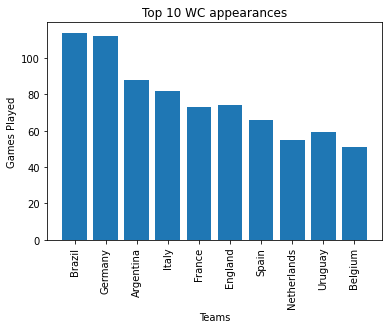

In [97]:
teams = [team for team in wc_teams.index]

plt.bar(teams[:10], wc_teams['Games Played'][:10])
plt.xticks(teams[:10], rotation='vertical', size=10)
plt.ylabel('Games Played')
plt.xlabel('Teams')
plt.title('Top 10 WC game appearances')
plt.show()

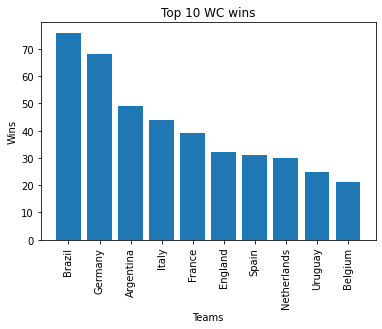

In [98]:
wc_teams = wc_teams.sort_values(['Win'], ascending=False)

plt.bar(teams[:10], wc_teams['Win'][:10])
plt.xticks(teams[:10],rotation='vertical',size=10)
plt.ylabel('Wins')
plt.xlabel('Teams')
plt.title('Top 10 WC wins')
plt.show()

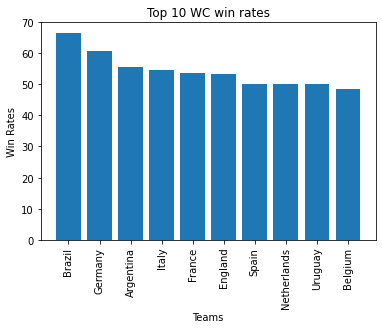

In [99]:
wc_teams = wc_teams.sort_values(['Win Rate'], ascending=False)

plt.bar(teams[:10],wc_teams['Win Rate'][:10])
plt.xticks(teams[:10], rotation='vertical', size=10)
plt.ylabel('Win Rates')
plt.xlabel('Teams')
plt.title('Top 10 WC win rates')
plt.show()

In [100]:
wc_sum

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,Germany,Hungary,Austria,16,26,140,5.4
5,1958,Sweden,Brazil,Sweden,France,16,35,126,3.6
6,1962,Chile,Brazil,Czechoslovakia,Chile,16,32,89,2.8
7,1966,England,England,Germany,Portugal,16,32,89,2.8
8,1970,Mexico,Brazil,Italy,Germany,16,32,95,3.0
9,1974,Germany,Germany,Netherlands,Poland,16,38,97,2.6


Get the number of world cups won by team sorted by most

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'Italy'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Argentina'),
  Text(4, 0, 'Uruguay'),
  Text(5, 0, 'France'),
  Text(6, 0, 'England'),
  Text(7, 0, 'Spain')])

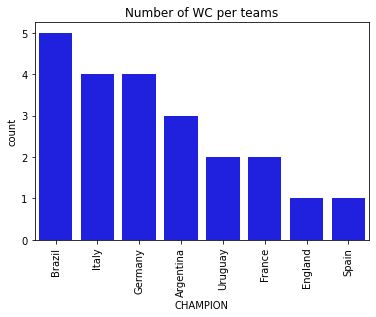

In [101]:
wc_champs = wc_sum['CHAMPION'].value_counts()

sns.countplot(data=wc_sum, x='CHAMPION', order=wc_champs.index.values, color='b')
plt.title('Number of WC per teams')
plt.xticks(rotation=90)

Again.
Merge USA and United states
Also merging Soviet Union with Russia for simplicity

In [193]:
wc_data.loc[wc_data.Team == 'United States', 'Team'] = 'USA'

In [194]:
wc_data.loc[wc_data.Team == 'Soviet Union', 'Team'] = 'Russia'

Text(0.5, 1.0, 'Number of World cups hosted per nation')

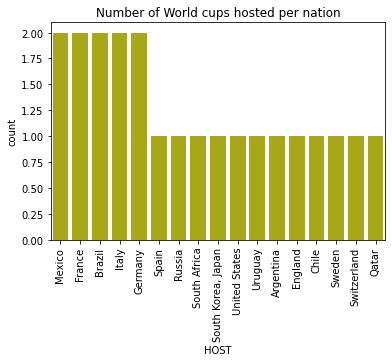

In [105]:
wc_hosted_sum = wc_sum['HOST'].value_counts()

sns.countplot(data=wc_sum, x='HOST',order=wc_hosted_sum.index.values, color='y')
plt.xticks(rotation='90')
plt.title('Number of World cups hosted per nation')
#plt.show()

Text(0.5, 1.0, 'Number of World Cup Runner ups per nation')

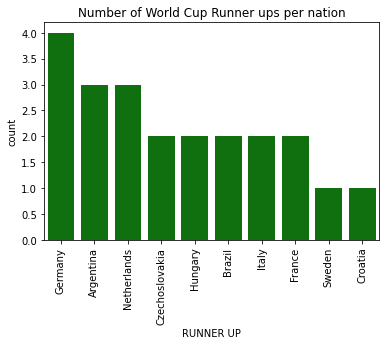

In [106]:
wc_runnerup_sum = wc_sum['RUNNER UP'].value_counts()

sns.countplot(data=wc_sum, x='RUNNER UP', order=wc_runnerup_sum.index.values, color='g')
plt.xticks(rotation='90')
plt.title('Number of World Cup Runner ups per nation')

Text(0.5, 1.0, 'Number of World Cup Third Places per nation')

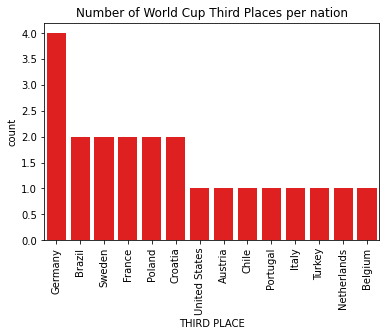

In [108]:
wc_third_sum = wc_sum['THIRD PLACE'].value_counts()

sns.countplot(data=wc_sum, x='THIRD PLACE', order=wc_third_sum.index.values, color='r')
plt.xticks(rotation='90')
plt.title('Number of World Cup Third Places per nation')

In [112]:
wc_sum.loc[wc_sum['HOST'] == wc_sum['CHAMPION'], 'HOST WINNER'] = True
wc_sum

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME,HOST WINNER
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6,True
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1,True
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7,False
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0,False
4,1954,Switzerland,Germany,Hungary,Austria,16,26,140,5.4,False
5,1958,Sweden,Brazil,Sweden,France,16,35,126,3.6,False
6,1962,Chile,Brazil,Czechoslovakia,Chile,16,32,89,2.8,False
7,1966,England,England,Germany,Portugal,16,32,89,2.8,True
8,1970,Mexico,Brazil,Italy,Germany,16,32,95,3.0,False
9,1974,Germany,Germany,Netherlands,Poland,16,38,97,2.6,True


In [113]:
wc_sum[wc_sum['HOST WINNER'] == True]

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME,HOST WINNER
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6,True
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1,True
7,1966,England,England,Germany,Portugal,16,32,89,2.8,True
9,1974,Germany,Germany,Netherlands,Poland,16,38,97,2.6,True
10,1978,Argentina,Argentina,Netherlands,Brazil,16,38,102,2.7,True
15,1998,France,France,Brazil,Croatia,32,64,171,2.7,True


Text(0.5, 1.0, 'Number of Worlc cup HOST WINNERs')

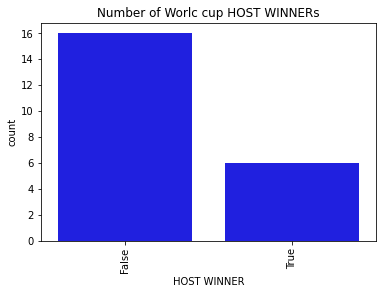

In [115]:
sns.countplot(data=wc_sum, x='HOST WINNER', color='b')
plt.xticks(rotation='90')
plt.title('Number of Worlc cup HOST WINNERs')

In [124]:
appearances = wc_data['Team'].value_counts().rename('appearances')

In [135]:
appearances[appearances.sort_values(ascending=False) > 10]

Brazil           22
Germany          20
Italy            18
Argentina        18
Mexico           17
Spain            16
England          16
France           16
Uruguay          14
Belgium          14
Sweden           12
Switzerland      12
United States    11
South Korea      11
Netherlands      11
Russia           11
Name: appearances, dtype: int64

In [140]:
unique = wc_data['Team'].nunique()

In [125]:
wc_appearances = wc_data.merge(appearances.to_frame(), left_on='Team', right_index=True)
wc_appearances

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,appearances
0,1,Uruguay,4,3,1,0,15,5,10,7,14
44,16,Uruguay,4,0,2,2,2,8,−6,2,14
68,16,Uruguay,4,1,1,2,2,5,−3,3,14
128,4,Uruguay,5,3,0,2,16,9,7,6,14
141,1,Uruguay,4,4,0,0,15,3,12,8,14
...,...,...,...,...,...,...,...,...,...,...,...
179,20,Czech Republic,3,1,0,2,3,4,−1,3,1
182,23,Angola,3,0,2,1,1,2,−1,2,1
186,27,Trinidad and Tobago,3,0,1,2,0,4,−4,1,1
189,30,Togo,3,0,0,3,1,6,−5,0,1


In [128]:
wc_appearances.sort_values(['appearances'], ascending=False)

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,appearances
284,4,Brazil,7,3,2,2,6,4,2,8,22
201,1,Brazil,6,6,0,0,19,7,12,12,22
105,5,Brazil,5,4,0,1,15,6,9,8,22
130,6,Brazil,3,1,1,1,8,5,3,3,22
146,6,Brazil,2,1,0,1,5,2,3,2,22
...,...,...,...,...,...,...,...,...,...,...,...
176,7,Cuba,3,1,1,1,5,12,−7,3,1
76,24,United Arab Emirates,3,0,0,3,2,11,−9,0,1
121,21,Kuwait,3,0,1,2,2,6,−4,1,1
286,6,East Germany,6,2,2,2,5,5,0,6,1


In [129]:
top10_wc_appearances = wc_appearances[wc_appearances['appearances'] > 13] #refer to apperearances table
top10_wc_appearances

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,appearances
0,1,Uruguay,4,3,1,0,15,5,10,7,14
44,16,Uruguay,4,0,2,2,2,8,−6,2,14
68,16,Uruguay,4,1,1,2,2,5,−3,3,14
128,4,Uruguay,5,3,0,2,16,9,7,6,14
141,1,Uruguay,4,4,0,0,15,3,12,8,14
...,...,...,...,...,...,...,...,...,...,...,...
251,19,Belgium,3,0,3,0,3,3,0,3,14
22,23,Belgium,3,1,1,1,1,2,-1,4,14
34,3,Belgium,7,6,0,1,16,6,10,18,14
77,14,Belgium,4,1,2,1,6,7,−1,5,14


In [136]:
top10_wc_appearances['Team'].nunique()

10

Text(0.5, 1.0, 'Number of World Cup apperances')

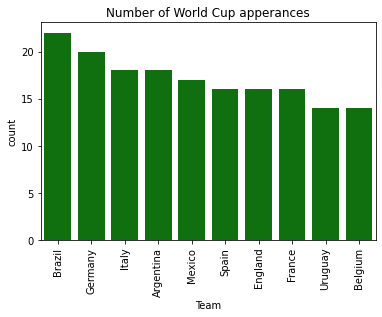

In [137]:
top10_wc_appearances_count = top10_wc_appearances['Team'].value_counts()

sns.countplot(data=top10_wc_appearances, x='Team', order=top10_wc_appearances_count.index.values, color='g')
plt.xticks(rotation='90')
plt.title('Number of World Cup apperances')

In [146]:
one_wc = wc_appearances[wc_appearances['appearances'] == 1]
one_unique = one_wc['Team'].nunique()
one_wc

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,appearances
51,23,Iraq,3,0,0,3,1,4,−3,0,1
76,24,United Arab Emirates,3,0,0,3,2,11,−9,0,1
121,21,Kuwait,3,0,1,2,2,6,−4,1,1
176,7,Cuba,3,1,1,1,5,12,−7,3,1
184,15,Dutch East Indies,1,0,0,1,0,6,−6,0,1
212,12,Israel*,3,0,2,1,1,3,−2,2,1
213,13,Bulgaria**,3,0,1,2,5,9,−4,1,1
242,10,FR Yugoslavia,4,2,1,1,5,4,1,7,1
254,22,Jamaica,3,1,0,2,3,9,−6,3,1
286,6,East Germany,6,2,2,2,5,5,0,6,1


In [141]:
unique

85

In [150]:
print(f"{one_unique/unique * 100}% of the {unique} teams that have apperared in the World cups from 1930-2022 only have one appearance" )

28.235294117647058% of the 85 teams that have apperared in the World cups from 1930-2022 only have one appearance


In [151]:
wc_sum

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME,HOST WINNER
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6,True
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1,True
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7,False
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0,False
4,1954,Switzerland,Germany,Hungary,Austria,16,26,140,5.4,False
5,1958,Sweden,Brazil,Sweden,France,16,35,126,3.6,False
6,1962,Chile,Brazil,Czechoslovakia,Chile,16,32,89,2.8,False
7,1966,England,England,Germany,Portugal,16,32,89,2.8,True
8,1970,Mexico,Brazil,Italy,Germany,16,32,95,3.0,False
9,1974,Germany,Germany,Netherlands,Poland,16,38,97,2.6,True


Text(0.5, 1.0, 'Total goals at each World Cup')

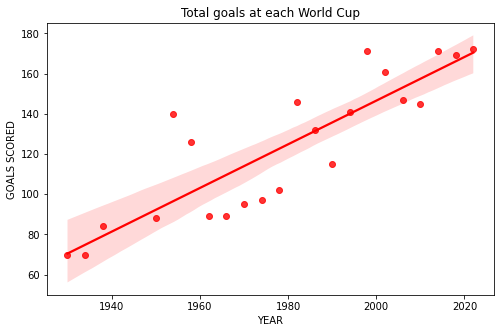

In [156]:
plt.figure(figsize=(8,5))

sns.regplot(x=wc_sum['YEAR'], y=wc_sum['GOALS SCORED'], color='r')
plt.xlabel('YEAR')
plt.ylabel('GOALS SCORED')
plt.title('Total goals at each World Cup')

Text(0.5, 1.0, 'Total Matches played per World Cup')

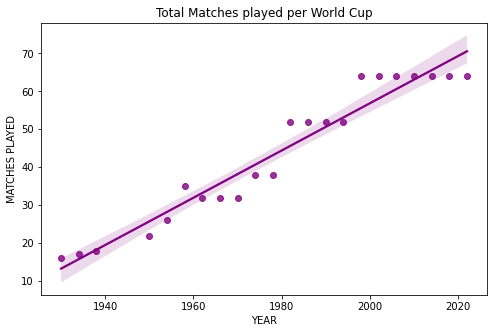

In [157]:
plt.figure(figsize=(8,5))

sns.regplot(data=wc_sum, x='YEAR', y='MATCHES PLAYED', color='purple')
plt.xlabel('YEAR')
plt.ylabel('MATCHES PLAYED')
plt.title('Total Matches played per World Cup')

Text(0.5, 1.0, 'AVG GOALS per World Cup')

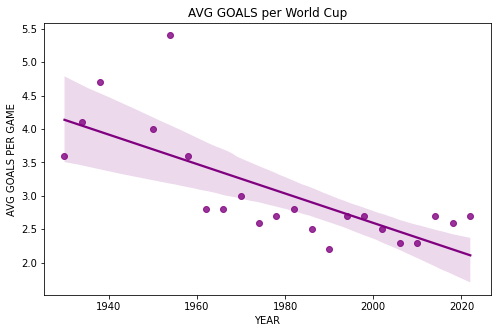

In [159]:
plt.figure(figsize=(8,5))

sns.regplot(data=wc_sum, x='YEAR', y='AVG GOALS PER GAME', color='purple')
plt.xlabel('YEAR')
plt.ylabel('AVG GOALS PER GAME')
plt.title('AVG GOALS per World Cup')

Text(0.5, 1.0, 'Number of Teams per World Cup')

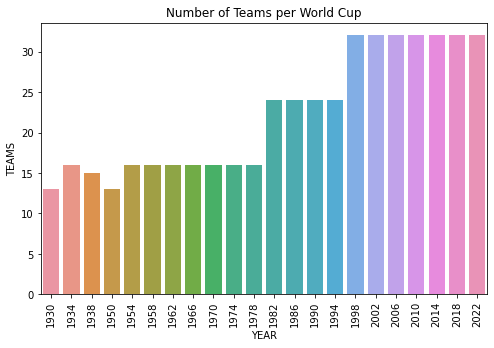

In [165]:
plt.figure(figsize=(8,5))

sns.barplot(data=wc_sum, x='YEAR', y='TEAMS')
plt.xticks(rotation='90')
plt.title('Number of Teams per World Cup')

In [180]:
wc_data.isnull().any()

Position           False
Team               False
Games Played       False
Win                False
Draw               False
Loss               False
Goals For          False
Goals Against      False
Goal Difference    False
Points             False
dtype: bool

In [195]:
wc_data.corr()

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points
Position,1.000000,-0.633070,-0.744071,-0.168495,0.474274,-0.700532,0.016718,-0.696855
Games Played,-0.633070,1.000000,0.839126,0.357471,-0.180535,0.745511,0.129258,0.868127
Win,-0.744071,0.839126,1.000000,0.009900,-0.418880,0.838177,-0.021870,0.940185
Draw,-0.168495,0.357471,0.009900,1.000000,-0.455563,0.078947,-0.180438,0.225447
Loss,0.474274,-0.180535,-0.418880,-0.455563,1.000000,-0.349924,0.488261,-0.484378
Goals For,-0.700532,0.745511,0.838177,0.078947,-0.349924,1.000000,0.227007,0.765156
Goals Against,0.016718,0.129258,-0.021870,-0.180438,0.488261,0.227007,1.000000,-0.095370
Points,-0.696855,0.868127,0.940185,0.225447,-0.484378,0.765156,-0.095370,1.000000


Text(0.5, 1.0, 'Correlation between columns')

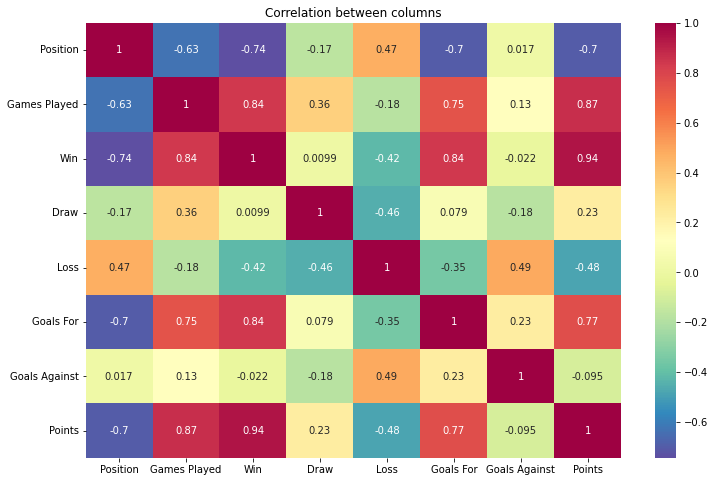

In [197]:
plt.figure(figsize=(12,8))

sns.heatmap(wc_data.corr(), cmap='Spectral_r', annot=True)
plt.title('Correlation between columns')

# World map

In [199]:
!pip3 install pycountry

     |████████████████████████████████| 10.1 MB 5.8 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681831 sha256=f511ddc5a7c2709d58a8d5c87ad6a8816aa145a93957ffb0500b52aad662696b
  Stored in directory: /Users/johaninho/Library/Caches/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [213]:
import plotly.express as px
import pycountry

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

In [214]:
wc_sum["HOST"] = [countries.get(x, 'Unknown code') for x in wc_sum["HOST"]]

In [222]:
wc_sum.loc[wc_sum["YEAR"] == 1930, "HOST"] = 'URY'
wc_sum.loc[wc_sum["YEAR"] == 1934, "HOST"] = 'ITA'
wc_sum.loc[wc_sum["YEAR"] == 1938, "HOST"] = 'FRA'
wc_sum.loc[wc_sum["YEAR"] == 1950, "HOST"] = 'BRA'
wc_sum.loc[wc_sum["YEAR"] == 1954, "HOST"] = 'CHE'
wc_sum.loc[wc_sum["YEAR"] == 1958, "HOST"] = 'SWE'
wc_sum.loc[wc_sum["YEAR"] == 1962, "HOST"] = 'CHL'
wc_sum.loc[wc_sum["YEAR"] == 1966, "HOST"] = 'GBR'
wc_sum.loc[wc_sum["YEAR"] == 1970, "HOST"] = 'MEX'
wc_sum.loc[wc_sum["YEAR"] == 1974, "HOST"] = 'DEU'
wc_sum.loc[wc_sum["YEAR"] == 1978, "HOST"] = 'ARG'
wc_sum.loc[wc_sum["YEAR"] == 1982, "HOST"] = 'ESP'
wc_sum.loc[wc_sum["YEAR"] == 1986, "HOST"] = 'MEX'
wc_sum.loc[wc_sum["YEAR"] == 1990, "HOST"] = 'ITA'
wc_sum.loc[wc_sum["YEAR"] == 1994, "HOST"] = 'USA'
wc_sum.loc[wc_sum["YEAR"] == 1998, "HOST"] = 'FRA'
wc_sum.loc[wc_sum["YEAR"] == 2002, "HOST"] = 'JPN'
wc_sum.loc[wc_sum["YEAR"] == 2006, "HOST"] = 'DEU'
wc_sum.loc[wc_sum["YEAR"] == 2010, "HOST"] = 'ZAF'
wc_sum.loc[wc_sum["YEAR"] == 2014, "HOST"] = 'BRA'
wc_sum.loc[wc_sum["YEAR"] == 2018, "HOST"] = 'RUS'
wc_sum.loc[wc_sum["YEAR"] == 2022, "HOST"] = 'QAT'

In [223]:
wc_sum

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME,HOST WINNER
0,1930,URY,Uruguay,Argentina,United States,13,16,70,3.6,True
1,1934,ITA,Italy,Czechoslovakia,Germany,16,17,70,4.1,True
2,1938,FRA,Italy,Hungary,Brazil,15,18,84,4.7,False
3,1950,BRA,Uruguay,Brazil,Sweden,13,22,88,4.0,False
4,1954,CHE,Germany,Hungary,Austria,16,26,140,5.4,False
5,1958,SWE,Brazil,Sweden,France,16,35,126,3.6,False
6,1962,CHL,Brazil,Czechoslovakia,Chile,16,32,89,2.8,False
7,1966,GBR,England,Germany,Portugal,16,32,89,2.8,True
8,1970,MEX,Brazil,Italy,Germany,16,32,95,3.0,False
9,1974,DEU,Germany,Netherlands,Poland,16,38,97,2.6,True


### Map visualization of the host countries throughout the years

In [224]:
fig = px.choropleth(wc_sum.sort_values("YEAR"), 
                    locations="HOST",
                    hover_name="HOST",
                    hover_data=wc_sum.columns,
                    color="AVG GOALS PER GAME",
                    range_color=(min(wc_sum["AVG GOALS PER GAME"]), max(wc_sum["AVG GOALS PER GAME"])), 
                    projection="natural earth",
                    animation_frame = "YEAR"
                   
                   )

fig.update_layout(margin={"r":5,"t":0,"l":5,"b":0})
fig.show()

In [226]:
wc_sum.loc[(wc_sum["HOST"] == 'URY') | (wc_sum["HOST"] == 'BRA') | (wc_sum["HOST"] == 'CHL') | (wc_sum["HOST"] == 'ARG'), 
            "HOST_CONTINENT"] = 'South America'
wc_sum.loc[(wc_sum["HOST"] == 'ITA') | (wc_sum["HOST"] == 'FRA') | (wc_sum["HOST"] == 'DEU') | (wc_sum["HOST"] == 'GBR') | 
            (wc_sum["HOST"] == 'SWE') | (wc_sum["HOST"] == 'CHE') | (wc_sum["HOST"] == 'ESP'), 
            "HOST_CONTINENT"] = 'Europe'
wc_sum.loc[(wc_sum["HOST"] == 'QAT') | (wc_sum["HOST"] == 'JPN') | (wc_sum["HOST"] == 'RUS'), 
            "HOST_CONTINENT"] = 'Asia'
wc_sum.loc[(wc_sum["HOST"] == 'USA') | (wc_sum["HOST"] == 'MEX'), 
            "HOST_CONTINENT"] = 'North America'
wc_sum.loc[(wc_sum["HOST"] == 'ZAF'), 
            "HOST_CONTINENT"] = 'Africa'
wc_sum

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME,HOST WINNER,HOST_CONTINENT
0,1930,URY,Uruguay,Argentina,United States,13,16,70,3.6,True,South America
1,1934,ITA,Italy,Czechoslovakia,Germany,16,17,70,4.1,True,Europe
2,1938,FRA,Italy,Hungary,Brazil,15,18,84,4.7,False,Europe
3,1950,BRA,Uruguay,Brazil,Sweden,13,22,88,4.0,False,South America
4,1954,CHE,Germany,Hungary,Austria,16,26,140,5.4,False,Europe
5,1958,SWE,Brazil,Sweden,France,16,35,126,3.6,False,Europe
6,1962,CHL,Brazil,Czechoslovakia,Chile,16,32,89,2.8,False,South America
7,1966,GBR,England,Germany,Portugal,16,32,89,2.8,True,Europe
8,1970,MEX,Brazil,Italy,Germany,16,32,95,3.0,False,North America
9,1974,DEU,Germany,Netherlands,Poland,16,38,97,2.6,True,Europe


In [227]:
continents = wc_sum['HOST_CONTINENT'].value_counts()
continents

Europe           10
South America     5
North America     3
Asia              3
Africa            1
Name: HOST_CONTINENT, dtype: int64

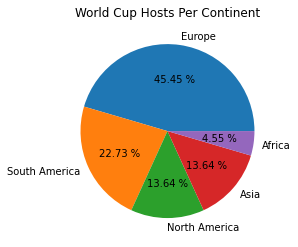

In [230]:
plt.pie(continents, labels=['Europe', 'South America', 'North America', 'Asia', 'Africa'], autopct='%.2f %%')
plt.title('World Cup Hosts Per Continent');

In [232]:
wc_sum.loc[(wc_sum["CHAMPION"] == 'Uruguay') | (wc_sum["CHAMPION"] == 'Brazil') | (wc_sum["CHAMPION"] == 'Argentina'), 
            "CHAMPION_CONTINENT"] = 'South America'
wc_sum.loc[(wc_sum["CHAMPION"] == 'Italy') | (wc_sum["CHAMPION"] == 'Germany') | (wc_sum["CHAMPION"] == 'England') | (wc_sum["CHAMPION"] == 'France') | (wc_sum["CHAMPION"] == 'Spain'), 
            "CHAMPION_CONTINENT"] = 'Europe'
wc_sum

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME,HOST WINNER,HOST_CONTINENT,CHAMPION_CONTINENT
0,1930,URY,Uruguay,Argentina,United States,13,16,70,3.6,True,South America,South America
1,1934,ITA,Italy,Czechoslovakia,Germany,16,17,70,4.1,True,Europe,Europe
2,1938,FRA,Italy,Hungary,Brazil,15,18,84,4.7,False,Europe,Europe
3,1950,BRA,Uruguay,Brazil,Sweden,13,22,88,4.0,False,South America,South America
4,1954,CHE,Germany,Hungary,Austria,16,26,140,5.4,False,Europe,Europe
5,1958,SWE,Brazil,Sweden,France,16,35,126,3.6,False,Europe,South America
6,1962,CHL,Brazil,Czechoslovakia,Chile,16,32,89,2.8,False,South America,South America
7,1966,GBR,England,Germany,Portugal,16,32,89,2.8,True,Europe,Europe
8,1970,MEX,Brazil,Italy,Germany,16,32,95,3.0,False,North America,South America
9,1974,DEU,Germany,Netherlands,Poland,16,38,97,2.6,True,Europe,Europe


In [233]:
champs = wc_sum['CHAMPION'].value_counts()
champs

Brazil       5
Italy        4
Germany      4
Argentina    3
Uruguay      2
France       2
England      1
Spain        1
Name: CHAMPION, dtype: int64

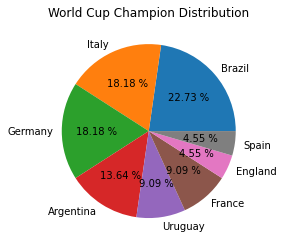

In [234]:
plt.pie(champs, labels=['Brazil', 'Italy', 'Germany', 'Argentina', 'Uruguay', 'France', 'England', 'Spain'], autopct='%.2f %%')
plt.title('World Cup Champion Distribution');

In [235]:
conts_champs = wc_sum['CHAMPION_CONTINENT'].value_counts()
conts_champs.head()

Europe           12
South America    10
Name: CHAMPION_CONTINENT, dtype: int64

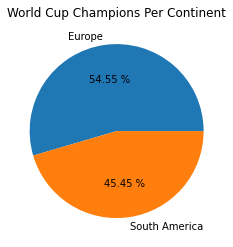

In [236]:
plt.pie(conts_champs, labels=['Europe', 'South America'], autopct='%.2f %%')
plt.title('World Cup Champions Per Continent');